In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [ ]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [ ]:
#!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

In [ ]:
!ls

a-rfr-ed.jpg  cell-images-for-detecting-malaria.zip  readme.md	seg_train
b	      DB1_B				     real	SOCOFing
big.file      intel-image-classification.zip	     seg_pred	train
cell_images   kaggle.json			     seg_test


In [ ]:
#!unzip '/content/gdrive/My Drive/kaggle/cell-images-for-detecting-malaria.zip'

In [ ]:
#import necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/gdrive/My Drive/kaggle/cell_images/cell_images/'

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle = True,
    target_size = (150,150),
    subset = 'training'
)

Found 22048 images belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(
    train_dir,
    shuffle = True,
    target_size = (150,150),
    subset = 'validation'
)

Found 5510 images belonging to 2 classes.


**MODEL**

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras import layers
from keras import optimizers
from keras import  Sequential

In [ ]:
model = Sequential([
                    Conv2D(32, 3, padding='same',activation='relu',kernel_initializer='he_uniform', input_shape = [150, 150, 3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(128, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(128, 3, padding='same',kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(128,kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(2, activation = 'softmax'),
                    ])

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
steps = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(train_generator, epochs = 20, steps_per_epoch= steps,callbacks=[early_stopping_cb], validation_steps= val_steps, validation_data= (valid_generator))

Epoch 1/20
689/689 [==============================] - 107s 155ms/step - loss: 0.5893 - accuracy: 0.6791 - val_loss: 0.4125 - val_accuracy: 0.8020
Epoch 2/20
689/689 [==============================] - 105s 153ms/step - loss: 0.3105 - accuracy: 0.8645 - val_loss: 0.3491 - val_accuracy: 0.9227
Epoch 3/20
689/689 [==============================] - 107s 156ms/step - loss: 0.1473 - accuracy: 0.9498 - val_loss: 0.0677 - val_accuracy: 0.9370
Epoch 4/20
689/689 [==============================] - 106s 154ms/step - loss: 0.1246 - accuracy: 0.9573 - val_loss: 0.0341 - val_accuracy: 0.9416
Epoch 5/20
689/689 [==============================] - 106s 154ms/step - loss: 0.1092 - accuracy: 0.9623 - val_loss: 0.3122 - val_accuracy: 0.9399
Epoch 6/20
689/689 [==============================] - 108s 157ms/step - loss: 0.0996 - accuracy: 0.9655 - val_loss: 0.0869 - val_accuracy: 0.9359
Epoch 7/20
689/689 [==============================] - 109s 158ms/step - loss: 0.0875 - accuracy: 0.9698 - val_loss: 5.9220e-

(0.0, 1.0)

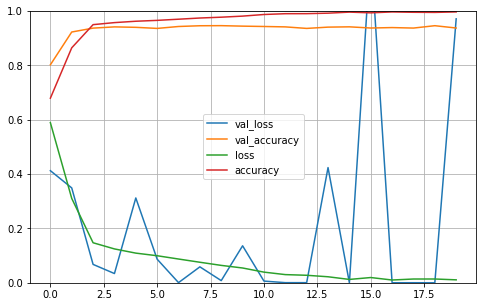

In [ ]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)


In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 18, 18, 64)       